In [ ]:
!pip install pycountry_convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 15.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import pycountry_convert as pc
import numpy as np

plt.style.use("default")
sns.set_theme(style="whitegrid", palette="muted")

Bibliotecas carregadas com sucesso!


In [ ]:
file_path = "World_Population_and_Health.csv"

df = pd.read_csv(file_path)

print("Dimensões:", df.shape)
print("\nColunas disponíveis:", df.columns.tolist())
print("\nVisualização inicial:")
display(df.head())

Dimensões: (1670, 13)

Colunas disponíveis: ['Country', 'Year', 'Population', 'country_code', 'health_exp', 'life_expect', 'maternal_mortality', 'infant_mortality', 'neonatal_mortality', 'under_5_mortality', 'prev_hiv', 'inci_tuberc', 'prev_undernourishment']

Visualização inicial:


,Country,Year,Population,country_code,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,inci_tuberc,prev_undernourishment
0,Afghanistan,2014,56805036,AFG,9.528878,62.545,785.0,56.2,43.5,75.3,0.1,189.0,19.3
1,Albania,2014,127571863,ALB,6.434511,78.407,7.0,8.8,5.9,9.9,0.1,16.0,4.5
2,Algeria,2014,147582820,DZA,6.547214,75.110,86.0,22.0,15.8,25.7,0.1,72.0,2.7
3,Andorra,2014,133274038,AND,6.773080,NaN,NaN,3.5,1.9,3.8,NaN,9.4,NaN
4,Angola,2014,35838921,AGO,2.434129,60.040,292.0,60.3,31.5,92.5,1.9,370.0,13.0


In [ ]:
print("Tipos de dados:\n", df.dtypes)

Tipos de dados:
 Country                   object
Year                       int64
Population                 int64
country_code              object
health_exp               float64
life_expect              float64
maternal_mortality       float64
infant_mortality         float64
neonatal_mortality       float64
under_5_mortality        float64
prev_hiv                 float64
inci_tuberc              float64
prev_undernourishment    float64
dtype: object


In [ ]:
print("\nValores ausentes por coluna:")
missing = df.isnull().sum().sort_values(ascending=False)
display(missing)


Valores ausentes por coluna:


,0
maternal_mortality,564
prev_hiv,509
prev_undernourishment,353
health_exp,343
life_expect,203
neonatal_mortality,176
infant_mortality,176
under_5_mortality,176
inci_tuberc,10
country_code,0


,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality
count,1467.000000,1106.000000,1494.000000,1494.000000,1494.000000
mean,71.646832,156.199819,21.767938,13.057296,29.075703
std,7.948903,230.446721,20.203533,11.026665,30.399477
min,50.033000,1.000000,1.300000,0.700000,1.500000
25%,65.407000,10.000000,5.400000,3.500000,6.400000
50%,72.794000,51.000000,14.050000,9.300000,16.250000
75%,77.807000,218.000000,33.075000,21.875000,43.275000
max,84.560000,1288.000000,95.800000,46.400000,140.500000


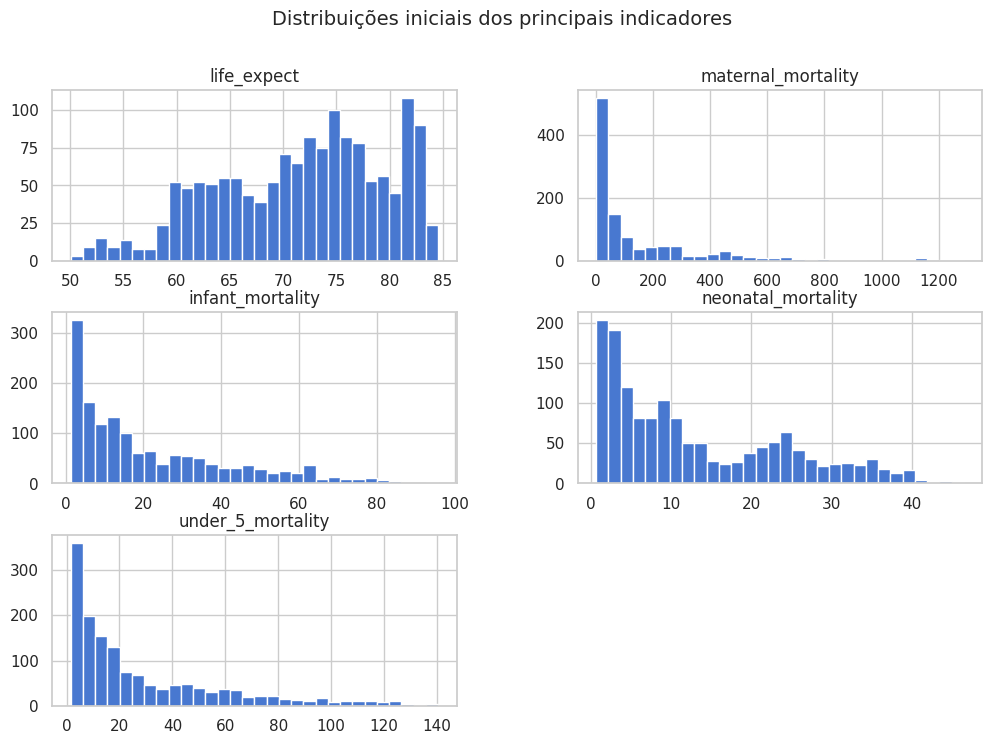

In [ ]:
desc = df[['life_expect', 'maternal_mortality', 'infant_mortality',
           'neonatal_mortality', 'under_5_mortality']].describe()

display(desc)

df[['life_expect', 'maternal_mortality', 'infant_mortality',
    'neonatal_mortality', 'under_5_mortality']].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribuições iniciais dos principais indicadores", fontsize=14)
plt.show()

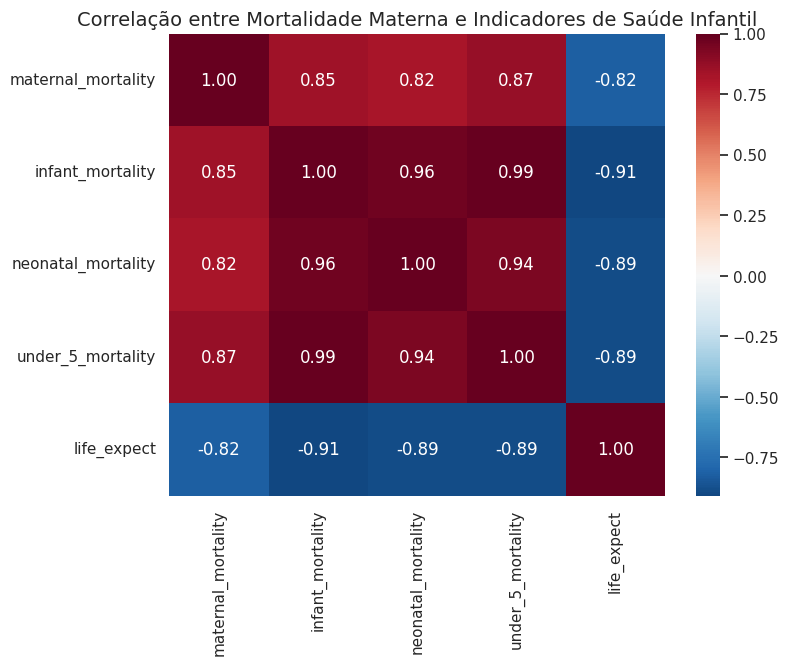

In [ ]:
corr_vars = ['maternal_mortality', 'infant_mortality',
             'neonatal_mortality', 'under_5_mortality', 'life_expect']

corr_matrix = df[corr_vars].corr(method='pearson')

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="RdBu_r", center=0)
plt.title("Correlação entre Mortalidade Materna e Indicadores de Saúde Infantil", fontsize=14)
plt.show()

In [ ]:
df_clean = df[corr_vars].dropna()

print("Dimensão original:", df.shape)
print("Dimensão após remoção de NaNs (apenas colunas-chave):", df_clean.shape)

Dimensão original: (1670, 13)
Dimensão após remoção de NaNs (apenas colunas-chave): (1106, 5)


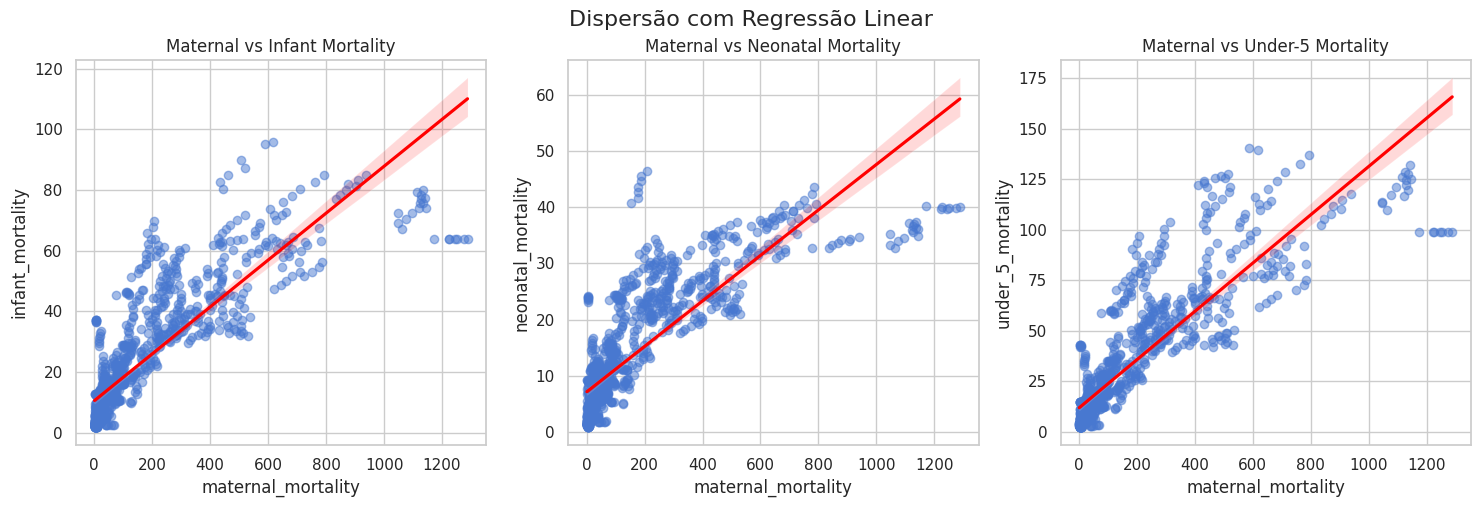

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.regplot(data=df_clean, x='maternal_mortality', y='infant_mortality',
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axes[0])
axes[0].set_title("Maternal vs Infant Mortality")

sns.regplot(data=df_clean, x='maternal_mortality', y='neonatal_mortality',
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axes[1])
axes[1].set_title("Maternal vs Neonatal Mortality")

sns.regplot(data=df_clean, x='maternal_mortality', y='under_5_mortality',
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axes[2])
axes[2].set_title("Maternal vs Under-5 Mortality")

plt.suptitle("Dispersão com Regressão Linear", fontsize=16)
plt.show()

In [ ]:
X = df_clean['maternal_mortality']
y = df_clean['infant_mortality']

X_const = sm.add_constant(X)

model = sm.OLS(y, X_const).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       infant_mortality   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     2882.
Date:                Thu, 11 Sep 2025   Prob (F-statistic):          4.74e-310
Time:                        20:32:54   Log-Likelihood:                -4223.5
No. Observations:                1106   AIC:                             8451.
Df Residuals:                    1104   BIC:                             8461.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.5304      0

In [ ]:
X_multi = df_clean[['maternal_mortality']].copy()

df_multi = df[['maternal_mortality', 'infant_mortality', 'health_exp']].dropna()

X_multi = df_multi[['maternal_mortality', 'health_exp']]
y_multi = df_multi['infant_mortality']

X_multi_const = sm.add_constant(X_multi)
model_multi = sm.OLS(y_multi, X_multi_const).fit()
print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:       infant_mortality   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1568.
Date:                Thu, 11 Sep 2025   Prob (F-statistic):          5.86e-321
Time:                        20:33:58   Log-Likelihood:                -4094.2
No. Observations:                1089   AIC:                             8194.
Df Residuals:                    1086   BIC:                             8209.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 18.1464      0

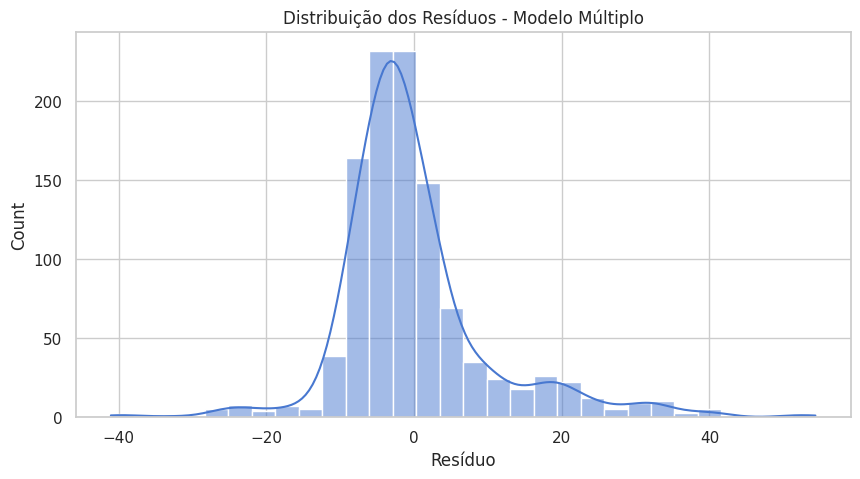

In [ ]:
residuals = model_multi.resid

plt.figure(figsize=(10,5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribuição dos Resíduos - Modelo Múltiplo")
plt.xlabel("Resíduo")
plt.show()

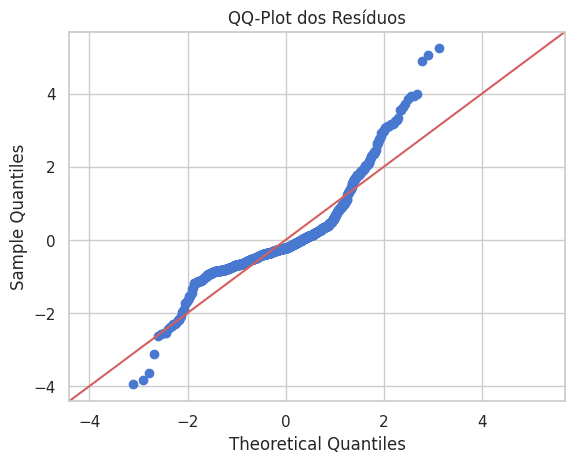

In [ ]:
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ-Plot dos Resíduos")
plt.show()

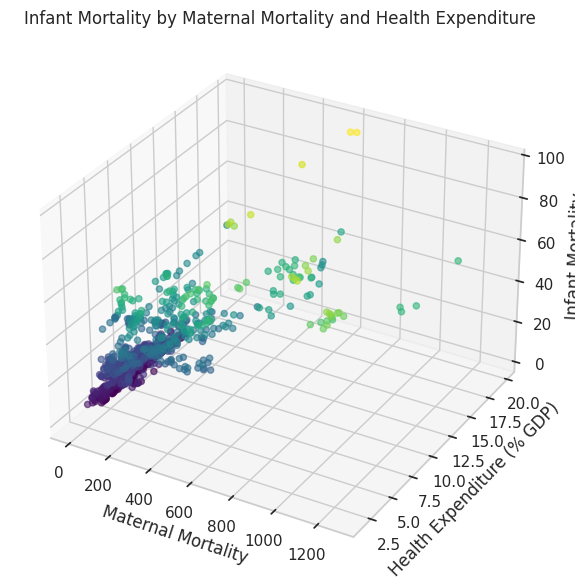

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_multi['maternal_mortality'],
           df_multi['health_exp'],
           df_multi['infant_mortality'],
           c=df_multi['infant_mortality'], cmap='viridis', alpha=0.6)

ax.set_xlabel("Maternal Mortality")
ax.set_ylabel("Health Expenditure (% GDP)")
ax.set_zlabel("Infant Mortality")
ax.set_title("Infant Mortality by Maternal Mortality and Health Expenditure")

plt.show()


In [ ]:
def get_continent(country_code):
    try:
        return pc.country_alpha3_to_continent_code(country_code)
    except:
        return None

df['continent'] = df['country_code'].apply(get_continent)

continent_map = {
    "AF": "Africa", "AS": "Asia", "EU": "Europe",
    "NA": "North America", "SA": "South America", "OC": "Oceania"
}
df['continent'] = df['continent'].map(continent_map)

for cont in df['continent'].dropna().unique():
    sub = df[(df['continent'] == cont)][['maternal_mortality','infant_mortality']].dropna()
    if len(sub) > 50:
        X = sm.add_constant(sub['maternal_mortality'])
        y = sub['infant_mortality']
        model = sm.OLS(y, X).fit()
        print(f"\n=== {cont} ===")
        print(model.summary())


In [ ]:
maternal_range = [50, 100, 200, 400, 800]
health_exp_range = [3, 5, 8, 12]

scenarios = []
for m in maternal_range:
    for h in health_exp_range:
        X_new = pd.DataFrame({'const':[1],
                              'maternal_mortality':[m],
                              'health_exp':[h]})
        pred = model_multi.predict(X_new)[0]
        scenarios.append((m, h, pred))

scenarios_df = pd.DataFrame(scenarios,
                            columns=['Maternal_Mortality','Health_Exp','Pred_Infant_Mortality'])
display(scenarios_df)


,Maternal_Mortality,Health_Exp,Pred_Infant_Mortality
0,50,3,18.563700
1,50,5,16.273656
2,50,8,12.838589
3,50,12,8.258501
4,100,3,22.416044
5,100,5,20.126000
6,100,8,16.690934
7,100,12,12.110845
8,200,3,30.120733
9,200,5,27.830689


In [ ]:
results_summary = {
    "R2_Simple": 0.723,
    "R2_Multiple": round(model_multi.rsquared, 3),
    "Coef_Maternal": round(model_multi.params['maternal_mortality'], 3),
    "Coef_HealthExp": round(model_multi.params['health_exp'], 3)
}

results_df = pd.DataFrame([results_summary])
results_df.to_csv("maternal_child_health_results.csv", index=False)

print("Resultados exportados para 'maternal_child_health_results.csv'")
display(results_df)

Resultados exportados para 'maternal_child_health_results.csv'


,R2_Simple,R2_Multiple,Coef_Maternal,Coef_HealthExp
0,0.723,0.743,0.077,-1.145


In [ ]:
temporal_df = df.groupby("Year")[["maternal_mortality", "infant_mortality"]].mean()

print("Série temporal (2014–2024):")
display(temporal_df)

Série temporal (2014–2024):


,maternal_mortality,infant_mortality
Year,,
2014,170.063291,24.051807
2015,164.607595,23.434940
2016,158.082278,22.833133
2017,153.645570,22.262048
2018,151.291139,21.703614
2019,148.373418,21.179518
2020,147.335443,20.662048
2021,NaN,20.141566
2022,NaN,19.642771


In [ ]:
influence = model_multi.get_influence()
standardized_residuals = influence.resid_studentized_internal

df_multi['std_residuals'] = standardized_residuals
df_multi['pred_infant_mortality'] = model_multi.fittedvalues

outliers_df = df_multi.join(df[['Country','country_code']], how='left')
outliers_df = outliers_df[['Country','maternal_mortality','health_exp',
                           'infant_mortality','pred_infant_mortality','std_residuals']]
outliers_df['abs_resid'] = outliers_df['std_residuals'].abs()
outliers_df = outliers_df.sort_values(by='abs_resid', ascending=False)

display(outliers_df.head(10))


,Country,maternal_mortality,health_exp,infant_mortality,pred_infant_mortality,std_residuals,abs_resid
302,Sierra Leone,588.0,19.658163,95.3,40.940961,5.305608,5.305608
135,Sierra Leone,618.0,19.690046,95.8,43.215861,5.134481,5.134481
469,Sierra Leone,505.0,15.788507,89.9,38.976912,4.935187,4.935187
809,South Sudan,1275.0,10.056160,63.8,104.866680,-4.005036,4.005036
970,Sierra Leone,435.0,9.129927,82.6,41.207851,3.986445,3.986445
1081,Kiribati,76.0,16.990000,45.5,4.548060,3.967282,3.967282
803,Sierra Leone,460.0,8.289876,85.0,44.095900,3.938893,3.938893
976,South Sudan,1245.0,9.037408,63.8,103.721767,-3.888217,3.888217
636,Sierra Leone,520.0,9.399761,87.4,47.447870,3.850440,3.850440
1137,Sierra Leone,443.0,9.325887,80.3,41.599847,3.727667,3.727667


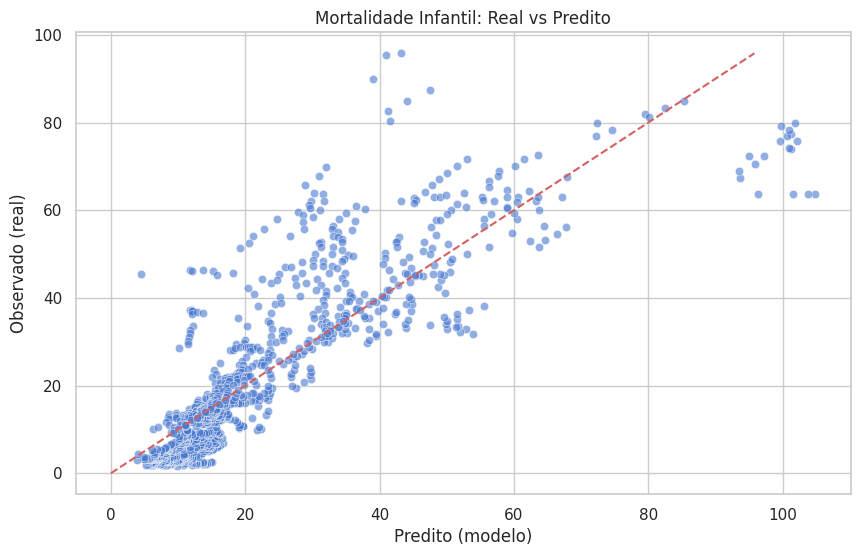

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=outliers_df['pred_infant_mortality'],
                y=outliers_df['infant_mortality'],
                alpha=0.6)

plt.plot([0, max(outliers_df['infant_mortality'])],
         [0, max(outliers_df['infant_mortality'])],
         'r--')

plt.xlabel("Predito (modelo)")
plt.ylabel("Observado (real)")
plt.title("Mortalidade Infantil: Real vs Predito")
plt.show()
